## Import libraries

Im importing the libraries because it is so fun

In [3]:
%load_ext autoreload
%autoreload 2

from EBE_PartA_update import (
    #functions
    load_location_and_solar_angles, find_dni, compare_dni, create_utrecht_dni_scatters, create_surfaces_POAs, calculate_optimal_angles,
    #global variables
    MODELS, LOCATIONS, KEY_LIST, TILTS, ORIENTATIONS, BUILDINGS, BUILDINGS_df
    ) 
    
import pandas as pd

from pvlib.irradiance import get_total_irradiance,disc,dirint,dirindex,erbs
from pvlib.solarposition import ephemeris
from pvlib.atmosphere import get_relative_airmass,get_absolute_airmass
from pvlib.clearsky import lookup_linke_turbidity,ineichen

import numpy as np
import pandas as pd




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
buildings = create_surface_dict(KEY_LIST,TILTS,ORIENTATIONS )
buildings

{'SurfaceASE': {'tilt': 90, 'orientation': 135},
 'SurfaceASW': {'tilt': 90, 'orientation': 225},
 'SurfaceBE': {'tilt': 90, 'orientation': 90},
 'SurfaceBS': {'tilt': 90, 'orientation': 180},
 'SurfaceBW': {'tilt': 90, 'orientation': 270},
 'RoofCS': {'tilt': 40, 'orientation': 180},
 'RoofCN': {'tilt': 40, 'orientation': 0},
 'RoofDW': {'tilt': 40, 'orientation': 270},
 'RoofDE': {'tilt': 40, 'orientation': 90},
 'RoofA': {'tilt': nan, 'orientation': nan},
 'RoofB': {'tilt': nan, 'orientation': nan}}

In [29]:
model = 'dirindex'
location = 'Eindhoven'

modelled_dni_Eind = (
    find_dni(model,location)
    .assign(dhi_dirindex = lambda df: df.ghi  - np.cos(np.rad2deg(df.zenith))*df[model] )
    
)



In [30]:
modelled_dni_Eind

,apparent_elevation,elevation,azimuth,apparent_zenith,zenith,solar_time,wind,temp,ghi,dirindex,dhi_dirindex
datetime,,,,,,,,,,,
2019-01-01 10:00:00+01:00,6.709397,6.709387,143.021563,83.290603,83.290613,9.302074,6.0,8.0,41.66670,7.155128,48.769216
2019-01-01 11:00:00+01:00,11.335730,11.335724,156.186274,78.664270,78.664276,10.301745,5.0,8.3,33.33336,0.000000,33.333360
2019-01-01 12:00:00+01:00,13.992526,13.992521,170.065166,76.007474,76.007479,11.301417,4.0,8.7,38.88892,0.000000,38.888920
2019-01-01 13:00:00+01:00,14.445971,14.445966,184.292621,75.554029,75.554034,12.301090,5.0,8.3,63.88894,0.000000,63.888940
2019-01-01 14:00:00+01:00,12.653303,12.653297,198.367133,77.346697,77.346703,13.300762,5.0,8.0,47.22226,0.000000,47.222260
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 11:00:00+01:00,11.280123,11.280118,156.346360,78.719877,78.719882,10.311633,2.0,6.0,186.11126,454.161806,-55.413398
2019-12-31 12:00:00+01:00,13.912775,13.912772,170.216025,76.087225,76.087228,11.311301,2.0,5.7,105.55564,40.156026,85.699055
2019-12-31 13:00:00+01:00,14.342988,14.342985,184.428223,75.657012,75.657015,12.310969,2.0,5.3,58.33338,0.000000,58.333380


datetime
2019-01-01 10:00:00+01:00      9.717347
2019-01-01 11:00:00+01:00      1.830533
2019-01-01 12:00:00+01:00      1.646474
2019-01-01 13:00:00+01:00      4.174691
2019-01-01 14:00:00+01:00      2.958026
                                ...    
2019-12-31 11:00:00+01:00    675.718718
2019-12-31 12:00:00+01:00     25.920559
2019-12-31 13:00:00+01:00      3.529415
2019-12-31 14:00:00+01:00      0.667799
2019-12-31 15:00:00+01:00      0.021762
Name: dni, Length: 4039, dtype: float64

In [8]:
load_location_data('Eindhoven')


,apparent_elevation,elevation,azimuth,apparent_zenith,zenith,solar_time,wind,temp,ghi
datetime,,,,,,,,,
2019-01-01 10:00:00+01:00,6.709397,6.709387,143.021563,83.290603,83.290613,9.302074,6.0,8.0,41.66670
2019-01-01 11:00:00+01:00,11.335730,11.335724,156.186274,78.664270,78.664276,10.301745,5.0,8.3,33.33336
2019-01-01 12:00:00+01:00,13.992526,13.992521,170.065166,76.007474,76.007479,11.301417,4.0,8.7,38.88892
2019-01-01 13:00:00+01:00,14.445971,14.445966,184.292621,75.554029,75.554034,12.301090,5.0,8.3,63.88894
2019-01-01 14:00:00+01:00,12.653303,12.653297,198.367133,77.346697,77.346703,13.300762,5.0,8.0,47.22226
...,...,...,...,...,...,...,...,...,...
2019-12-31 11:00:00+01:00,11.280123,11.280118,156.346360,78.719877,78.719882,10.311633,2.0,6.0,186.11126
2019-12-31 12:00:00+01:00,13.912775,13.912772,170.216025,76.087225,76.087228,11.311301,2.0,5.7,105.55564
2019-12-31 13:00:00+01:00,14.342988,14.342985,184.428223,75.657012,75.657015,12.310969,2.0,5.3,58.33338


In [12]:
knmi_data

,wind,temp,ghi
datetime,,,
2019-01-01 01:00:00+00:00,4.0,7.3,0.0
2019-01-01 02:00:00+00:00,4.0,7.4,0.0
2019-01-01 03:00:00+00:00,4.0,7.3,0.0
2019-01-01 04:00:00+00:00,4.0,7.3,0.0
2019-01-01 05:00:00+00:00,5.0,6.9,0.0
...,...,...,...
2019-12-31 20:00:00+00:00,4.0,3.0,0.0
2019-12-31 21:00:00+00:00,4.0,3.1,0.0
2019-12-31 22:00:00+00:00,4.0,2.7,0.0


In [54]:
eind_data = load_knmi_data()

,apparent_elevation,elevation,azimuth,apparent_zenith,zenith,solar_time,wind,temp,ghi
datetime,,,,,,,,,
2019-01-01 10:00:00+01:00,6.709397,6.709387,143.021563,83.290603,83.290613,9.302074,6.0,8.0,41.66670
2019-01-01 11:00:00+01:00,11.335730,11.335724,156.186274,78.664270,78.664276,10.301745,5.0,8.3,33.33336
2019-01-01 12:00:00+01:00,13.992526,13.992521,170.065166,76.007474,76.007479,11.301417,4.0,8.7,38.88892
2019-01-01 13:00:00+01:00,14.445971,14.445966,184.292621,75.554029,75.554034,12.301090,5.0,8.3,63.88894
2019-01-01 14:00:00+01:00,12.653303,12.653297,198.367133,77.346697,77.346703,13.300762,5.0,8.0,47.22226
...,...,...,...,...,...,...,...,...,...
2019-12-31 11:00:00+01:00,11.280123,11.280118,156.346360,78.719877,78.719882,10.311633,2.0,6.0,186.11126
2019-12-31 12:00:00+01:00,13.912775,13.912772,170.216025,76.087225,76.087228,11.311301,2.0,5.7,105.55564
2019-12-31 13:00:00+01:00,14.342988,14.342985,184.428223,75.657012,75.657015,12.310969,2.0,5.3,58.33338


In [49]:

 load_knmi_data()

,apparent_elevation,elevation,azimuth,apparent_zenith,zenith,solar_time,wind,temp,ghi
datetime,,,,,,,,,
2019-01-01 10:00:00+01:00,6.709397,6.709387,143.021563,83.290603,83.290613,9.302074,6.0,8.0,41.66670
2019-01-01 11:00:00+01:00,11.335730,11.335724,156.186274,78.664270,78.664276,10.301745,5.0,8.3,33.33336
2019-01-01 12:00:00+01:00,13.992526,13.992521,170.065166,76.007474,76.007479,11.301417,4.0,8.7,38.88892
2019-01-01 13:00:00+01:00,14.445971,14.445966,184.292621,75.554029,75.554034,12.301090,5.0,8.3,63.88894
2019-01-01 14:00:00+01:00,12.653303,12.653297,198.367133,77.346697,77.346703,13.300762,5.0,8.0,47.22226
...,...,...,...,...,...,...,...,...,...
2019-12-31 11:00:00+01:00,11.280123,11.280118,156.346360,78.719877,78.719882,10.311633,2.0,6.0,186.11126
2019-12-31 12:00:00+01:00,13.912775,13.912772,170.216025,76.087225,76.087228,11.311301,2.0,5.7,105.55564
2019-12-31 13:00:00+01:00,14.342988,14.342985,184.428223,75.657012,75.657015,12.310969,2.0,5.3,58.33338


In [45]:
knmi_data 


,wind,temp,ghi
datetime,,,
2019-01-01 00:00:00,4.0,7.3,0.0
2019-01-01 01:00:00,4.0,7.4,0.0
2019-01-01 02:00:00,4.0,7.3,0.0
2019-01-01 03:00:00,4.0,7.3,0.0
2019-01-01 04:00:00,5.0,6.9,0.0
...,...,...,...
2019-12-31 19:00:00,4.0,3.0,0.0
2019-12-31 20:00:00,4.0,3.1,0.0
2019-12-31 21:00:00,4.0,2.7,0.0


In [ ]:
get_total_irradiance(surface_tilt, surface_azimuth, solar_zenith, solar_azimuth, dni, ghi, dhi


In [ ]:
find_dni()

### Read data

In [6]:
UPOT_data = pd.read_csv("Irradiance_2015_UPOT.csv", sep = ';', index_col = "timestamp", parse_dates= True) 


In [7]:
# Locations
lat_UU, long_UU = 52.08746136865645, 5.168080610130638 # used long/lat from googlemaps for uithof
lat_Eind, long_Eind = 51.451, 5.377

,Unnamed: 0,GHI,DNI,DHI,temp_air
timestamp,,,,,
2015-01-01 00:04:44,0,0.0,0.048286,0.0,2.9
2015-01-01 00:09:44,1,0.0,0.144858,0.0,3.0
2015-01-01 00:14:44,2,0.0,0.000000,0.0,2.9
2015-01-01 00:19:44,3,0.0,0.096572,0.0,2.9
2015-01-01 00:24:44,4,0.0,0.000000,0.0,2.9
...,...,...,...,...,...
2015-12-31 23:36:47,599303,0.0,0.096540,0.0,7.0
2015-12-31 23:41:47,599304,0.0,0.193080,0.0,7.2
2015-12-31 23:46:47,599305,0.0,0.096540,0.0,7.3


In [56]:
find_dni('dirindex', eind_data, eind_data, "KNMI_EIND")

NameError: name 'knmi_data' is not defined

In [22]:
#Calculate Eindhoven DNI using the dirindex model 
modelled_dni_Eind = find_dni('dirindex',  "Eindhoven")
modelled_dni_Eind

modelled_dni_Eind = (
    find_dni(model,location)
    .assign(dhi_dirindex = lambda df: df.ghi  - np.cos(np.rad2deg(df.zenith))*df[model] )
    
)

,apparent_elevation,elevation,azimuth,apparent_zenith,zenith,solar_time,wind,temp,ghi,dirindex
datetime,,,,,,,,,,
2019-01-01 10:00:00+01:00,6.709397,6.709387,143.021563,83.290603,83.290613,9.302074,6.0,8.0,41.66670,7.155128
2019-01-01 11:00:00+01:00,11.335730,11.335724,156.186274,78.664270,78.664276,10.301745,5.0,8.3,33.33336,0.000000
2019-01-01 12:00:00+01:00,13.992526,13.992521,170.065166,76.007474,76.007479,11.301417,4.0,8.7,38.88892,0.000000
2019-01-01 13:00:00+01:00,14.445971,14.445966,184.292621,75.554029,75.554034,12.301090,5.0,8.3,63.88894,0.000000
2019-01-01 14:00:00+01:00,12.653303,12.653297,198.367133,77.346697,77.346703,13.300762,5.0,8.0,47.22226,0.000000
...,...,...,...,...,...,...,...,...,...,...
2019-12-31 11:00:00+01:00,11.280123,11.280118,156.346360,78.719877,78.719882,10.311633,2.0,6.0,186.11126,454.161806
2019-12-31 12:00:00+01:00,13.912775,13.912772,170.216025,76.087225,76.087228,11.311301,2.0,5.7,105.55564,40.156026
2019-12-31 13:00:00+01:00,14.342988,14.342985,184.428223,75.657012,75.657015,12.310969,2.0,5.3,58.33338,0.000000


In [5]:
list(range(10,45,5))

[10, 15, 20, 25, 30, 35, 40]

In [9]:
model = 'dirindex'
location = 'Eindhoven'

modelled_dni_Eind = (
    find_dni(model,location)
    .assign(dhi_dirindex = lambda df: df.ghi  - np.cos(np.rad2deg(df.zenith))*df[model] )
    
)

#Calculate DHI from DNI


#Calculate the POAs

def calculate_POA_with_dirindex(surface:str, location_data:pd.DataFrame, surface_tilt:int, surface_azimuth:int):
    
    solar_zenith = location_data.zenith
    solar_azimuth = location_data.azimuth
    dni = location_data.dirindex
    ghi = location_data.ghi
    dhi = location_data.dhi_dirindex
    return get_total_irradiance(surface_tilt, surface_azimuth, solar_zenith, solar_azimuth, dni, ghi, dhi)

#calculate_POA_with_dirindex('SurfaceASE', modelled_dni_Eind, )

surfaces_to_calculate = {'RoofA':{'tilt': list(range(10,45,5)), "orientation":[135,225] } ,'RoofB':{'tilt': list(range(10,45,5)), "orientation": [180]} }

def calculate_optimal_angles(surfaces:dict):
    df = pd.DataFrame(columns = ['surface', 'tilt', 'orientation', 'sum of POA global'])
    for surface in surfaces:
        for tilt in surfaces[surface]['tilt']:
            for orientation in surfaces[surface]['orientation']:
                x = calculate_POA_with_dirindex(surface, modelled_dni_Eind, tilt, orientation)['poa_global'].sum()
                x = x/10**6 #NOTE CONVERSION TO MW
                df.loc[len(df)] = [surface,tilt,orientation,x] 
    return df
            
POA_sums = calculate_optimal_angles(surfaces_to_calculate)
POA_sums

,surface,tilt,orientation,sum of POA global
0,RoofA,10,135,1.547482
1,RoofA,10,225,1.459098
2,RoofA,15,135,1.573889
3,RoofA,15,225,1.443461
4,RoofA,20,135,1.593407
5,RoofA,20,225,1.423280
6,RoofA,25,135,1.605888
7,RoofA,25,225,1.398826
8,RoofA,30,135,1.611237
9,RoofA,30,225,1.371234


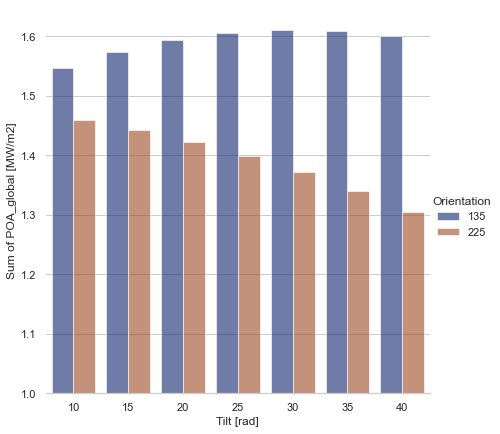

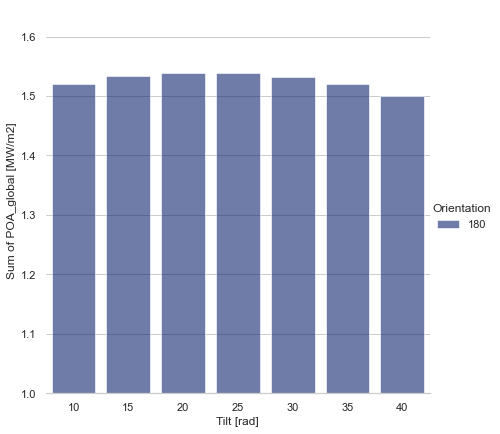

In [10]:


import seaborn as sns

def create_bar_charts(roof):
    """Enter roof A or B and get the bar chart of it"""
    sns.set_theme(style="whitegrid")
    
    #filter the POA_sums dataframe by roof A and roof B
    POA_totals = POA_sums[POA_sums['surface'] == roof]
    
    # Draw a nested barplot by species and sex
    g = sns.catplot(
        data = POA_totals, kind="bar",
        x="tilt", y="sum of POA global", hue="orientation",
        ci = None, palette="dark", alpha=.6, height=6
    )
    g.despine(left=True)
    g.set(ylim=(1, 1.65))
    g.set_axis_labels("Tilt [rad]", "Sum of POA_global [MW/m2]")
    g.legend.set_title('Orientation')
    
create_bar_charts('RoofA')
create_bar_charts('RoofB')

In [47]:
 surface = 'SurfaceASE'


{'poa_global': 'SurfaceASE_global',
 'poa_direct': 'SurfaceASE_direct',
 'poa_diffuse': 'SurfaceASE_diffuse',
 'poa_sky_diffuse': 'SurfaceASE_sky_diffuse',
 'poa_ground_diffuse': 'SurfaceASE_ground_diffuse'}

In [56]:
df = calculate_POA_with_dirindex('SurfaceASE', modelled_dni_Eind)
df.rename(columns=dict(zip(df.columns, [x.replace("poa",surface) for x in POA.columns])))

Index(['poa_global', 'poa_direct', 'poa_diffuse', 'poa_sky_diffuse',
       'poa_ground_diffuse'],
      dtype='object')

In [71]:
def create_surfaces_POAs(location_data:pd.DataFrame):
    
    df = pd.DataFrame()
    
    for surface in BUILDINGS:
        POA = calculate_POA_with_dirindex(surface,location_data)
        POA =  POA.rename(columns=dict(zip(POA.columns, [x.replace("poa",surface) for x in POA.columns])))
         
        
        df = pd.concat((df, POA), axis=1)
        
    return df

In [72]:
create_surfaces_POAs(modelled_dni_Eind)

,SurfaceASE_global,SurfaceASE_direct,SurfaceASE_diffuse,SurfaceASE_sky_diffuse,SurfaceASE_ground_diffuse,SurfaceASW_global,SurfaceASW_direct,SurfaceASW_diffuse,SurfaceASW_sky_diffuse,SurfaceASW_ground_diffuse,...,RoofA_global,RoofA_direct,RoofA_diffuse,RoofA_sky_diffuse,RoofA_ground_diffuse,RoofB_global,RoofB_direct,RoofB_diffuse,RoofB_sky_diffuse,RoofB_ground_diffuse
datetime,,,,,,,,,,,,,,,,,,,,,
2019-01-01 10:00:00+01:00,36.629542,7.036597,29.592945,24.384608,5.208337,30.584575,0.991630,29.592945,24.384608,5.208337,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 11:00:00+01:00,20.833350,0.000000,20.833350,16.666680,4.166670,20.833350,0.000000,20.833350,16.666680,4.166670,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 12:00:00+01:00,24.305575,0.000000,24.305575,19.444460,4.861115,24.305575,0.000000,24.305575,19.444460,4.861115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 13:00:00+01:00,39.930588,0.000000,39.930588,31.944470,7.986117,39.930588,0.000000,39.930588,31.944470,7.986117,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 14:00:00+01:00,29.513912,0.000000,29.513912,23.611130,5.902782,29.513912,0.000000,29.513912,23.611130,5.902782,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 11:00:00+01:00,410.390796,414.833588,-4.442792,-27.706699,23.263907,157.680863,162.123655,-4.442792,-27.706699,23.263907,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-31 12:00:00+01:00,87.888343,31.844360,56.043983,42.849528,13.194455,78.521049,22.477066,56.043983,42.849528,13.194455,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-31 13:00:00+01:00,36.458362,0.000000,36.458362,29.166690,7.291672,36.458362,0.000000,36.458362,29.166690,7.291672,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
 pd.concat((df, POA), axis=1)

In [7]:
def calculate_optimal_angles():
    for surface in surfaces:
        for tilt in surfaces[surface]['tilt']:
            for orientation in surfaces[surface]['orientation']:
                x = calculate_POA_with_dirindex(surfaces[surface], modelled_dni_Eind)
                return x

[autoreload of EBE_PartA_update failed: Traceback (most recent call last):
  File "C:\Users\NCG\anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\NCG\anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 394, in superreload
    module = reload(module)
  File "C:\Users\NCG\anaconda3\lib\imp.py", line 314, in reload
    return importlib.reload(module)
  File "C:\Users\NCG\anaconda3\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 779, in exec_module
  File "<frozen importlib._bootstrap_external>", line 916, in get_code
  File "<frozen importlib._bootstrap_external>", line 846, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "C:\Users\NCG\OneDrive\Documents\Utrecht University\Energy 